In [2]:
import datetime as dt
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
import sys
sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')

In [5]:
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
import Waveform as Waveform
import SiPM as SiPM

In [6]:
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)
importlib.reload(SiPM)

<module 'SiPM' from '../../../purity-monitor/SiPM.py'>

In [7]:
D0 = SiPM.SiPM(Path='/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211110/', 
                    Selection='SiPM_31V_SourceFar_*.h5')
D0.Ch = [Waveform.Waveform(ID=x, Pol=1) for x in range(1,3)]
print(D0.Files)
for File in D0.Files:
    D0.ImportDataFromHDF5(File, D0.Ch)

['/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211110/SiPM_31V_SourceFar_2.h5', '/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211110/SiPM_31V_SourceFar_0.h5', '/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211110/SiPM_31V_SourceFar_Second_1.h5', '/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211110/SiPM_31V_SourceFar_5.h5', '/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211110/SiPM_31V_SourceFar_1.h5', '/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211110/SiPM_31V_SourceFar_4.h5', '/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211110/SiPM_31V_SourceFar_Second_0.h5', '/project/david_moore/aj487/Data_WL110/LXe_Setup/TPC/20211110/SiPM_31V_SourceFar_3.h5']


In [8]:
print('nr of samples: ',len(D0.Ch[1].Time))
print('total time in us: ', D0.Ch[1].Time[-1]- D0.Ch[1].Time[0])
print('time between samples in us: ', (D0.Ch[1].Time[-1]- D0.Ch[1].Time[0])/len(D0.Ch[1].Time))
print('sampling rate in MHz: ',1/((D0.Ch[1].Time[-1]- D0.Ch[1].Time[0])/len(D0.Ch[1].Time)))

nr of samples:  117928
total time in us:  100002.09599999999
time between samples in us:  0.847992809171698
sampling rate in MHz:  1.1792552828092724


In [9]:
start = D0.Ch[1].Time[0]
length = D0.Ch[1].Time[-1] - D0.Ch[1].Time[0]
window = 1000
count = int(length/window)
print(start, length,window, count)

-50000.191999999995 100002.09599999999 1000 100


In [10]:
Amp = D0.Ch[1].Amp[0]-np.mean(D0.Ch[1].Amp[0])
j=11
offset = window*j
cut = np.where((D0.Ch[1].Time > start+offset) & (D0.Ch[1].Time < start+offset+window))[0]
y = D0.get_filtered_waveform(D0.Ch[1].Time, Amp, lowfreq=10, highfreq=100000, type='band', order=3)[cut]
D0.fit_peaks(D0.Ch[1].Time[cut], y)
D0.fit_parameters = np.array(D0.fit_parameters)

In [11]:
# plt.figure(figsize=(15,6))
# plt.xlim(-50000,50000)
# plt.ylim(-200,600)
# plt.xlabel('Time [$\mu$s]')
# plt.ylabel('Amplitude [mV]')
# plt.plot(D0.Ch[1].Time, D0.Ch[1].Amp[0])
# plt.savefig('v0_raw.png')

In [12]:
# plt.figure(figsize=(15,6))
# plt.xlim(-50000,50000)
# plt.ylim(-200,600)
# plt.xlabel('Time [$\mu$s]')
# plt.ylabel('Amplitude [mV]')
# plt.plot(D0.Ch[1].Time, Amp)
# plt.savefig('v1_baseline.png')

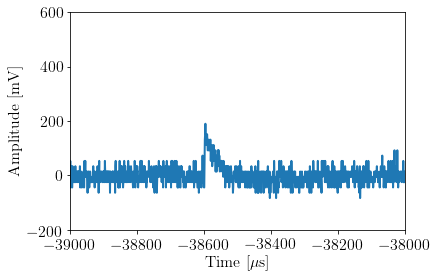

In [13]:
plt.figure()
plt.ylim(-200,600)
plt.xlabel('Time [$\mu$s]')
plt.ylabel('Amplitude [mV]')
plt.plot(D0.Ch[1].Time[cut], Amp[cut])
plt.savefig('v2_cut.pdf')

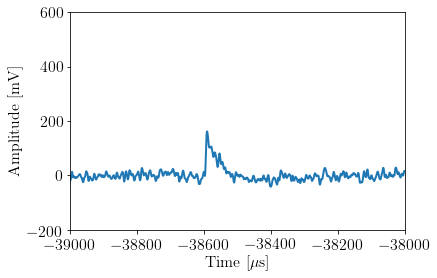

In [14]:
plt.figure()
plt.ylim(-200,600)
plt.xlabel('Time [$\mu$s]')
plt.ylabel('Amplitude [mV]')
plt.plot(D0.Ch[1].Time[cut], y)
plt.savefig('v3_filtered.pdf')

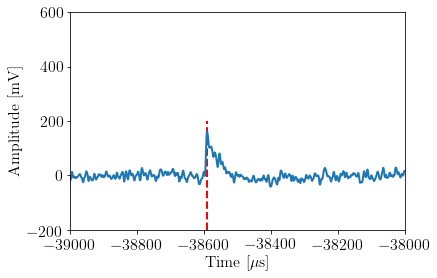

In [15]:
plt.figure()
plt.ylim(-200,600)
plt.xlabel('Time [$\mu$s]')
plt.ylabel('Amplitude [mV]')
plt.plot(D0.Ch[1].Time[cut], y)
for i,p in enumerate(D0.peak_pos[0]):
    plt.vlines(x=D0.Ch[1].Time[cut][p], ymin=-200,ymax=200, color='r', ls='--')
plt.savefig('v4_peak.pdf')

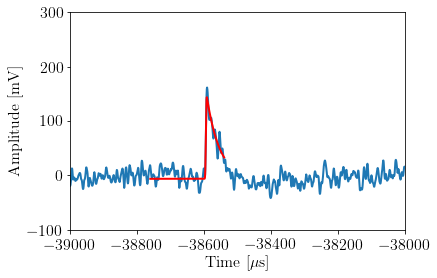

In [16]:
plt.figure()
# plt.xlim(-49900,-49700)
plt.ylim(-100,300)
plt.xlabel('Time [$\mu$s]')
plt.ylabel('Amplitude [mV]')
plt.plot(D0.Ch[1].Time[cut], y)


for i,p in enumerate(D0.peak_pos[0]):
    xfit = np.linspace(D0.Ch[1].Time[cut][p-200],D0.Ch[1].Time[cut][p+60],10000)
    
    # position of peak finder
#     plt.vlines(x=D0.Ch[1].Time[cut][p], ymin=-200,ymax=1000, color='grey', ls='--')
    
    # location of fitted max
#     plt.scatter(D0.Ch[1].Time[cut][p], D0.fit_parameters[i,1], marker='x', color='r', zorder=10)
    
    # location of max in fit
#     plt.scatter(D0.Ch[1].Time[cut][p], np.max(D0.func(xfit, *D0.fit_parameters[i])), marker='+', color='k', zorder=10)
    
    #plot fit
    plt.plot(xfit, D0.func(xfit, *D0.fit_parameters[i]), color='r', zorder=10)
plt.savefig('v5_fitraw.pdf')

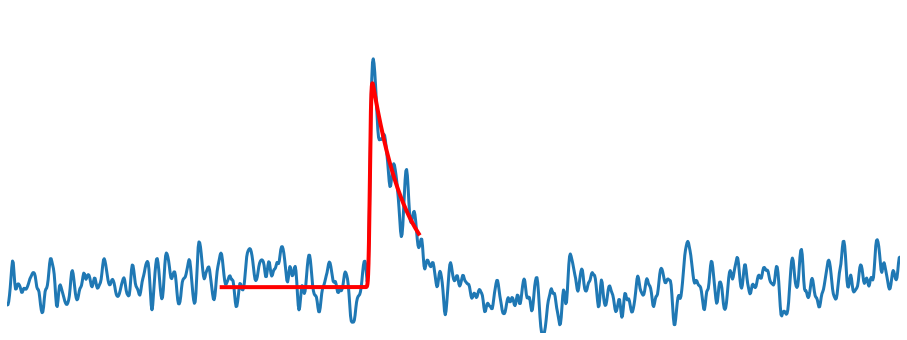

In [18]:
fig, ax = plt.subplots(figsize=(16,6), facecolor='white')
ax.axis('off')
# plt.xlim(-49900,-49700)
plt.ylim(-40,200)
plt.xticks([])
plt.yticks([])
# plt.xlabel('Time [$\mu$s]')
# plt.ylabel('Amplitude [mV]')
plt.plot(D0.Ch[1].Time[cut], y, lw=3)



for i,p in enumerate(D0.peak_pos[0]):
    xfit = np.linspace(D0.Ch[1].Time[cut][p-200],D0.Ch[1].Time[cut][p+60],10000)
    
    # position of peak finder
#     plt.vlines(x=D0.Ch[1].Time[cut][p], ymin=-200,ymax=1000, color='grey', ls='--')
    
    # location of fitted max
#     plt.scatter(D0.Ch[1].Time[cut][p], D0.fit_parameters[i,1], marker='x', color='r', zorder=10)
    
    # location of max in fit
#     plt.scatter(D0.Ch[1].Time[cut][p], np.max(D0.func(xfit, *D0.fit_parameters[i])), marker='+', color='k', zorder=10)
    
    #plot fit
    plt.plot(xfit, D0.func(xfit, *D0.fit_parameters[i]), color='r', zorder=10, lw=4, ls='-')
plt.savefig('v5_fitraw.pdf')